# Plotting Shapefile Data

In this lesson we will learn to work with a specific data type called `shapefiles` that are commonly used to store geospatial data. We will work with a specific dataset related to the Proctor Creek watershed in the Atlanta area.

First, we need to import the `geopandas` library. This is a version of the `pandas` library that you already learned about, but it has been modified to make it easier to work with GIS data.

In [28]:
%matplotlib inline
import geopandas as gpd

Next, we will read in a `shapefile` of watersheds in the Atlanta region, downloaded from [here](https://opendata.atlantaregional.com/datasets/rivers-streams-atlanta-region).

In [29]:
data = gpd.read_file('Rivers_Streams_Atlanta_Region.shp')

Let's take a look at the data. You can see that it looks like a `pandas` dataframe:

In [30]:
data

,OBJECTID,FEATURE,FEATURE_TY,STATE_FIPS,COUNTY_FIP,HUC,NAME,CLASS,GlobalID,last_edite,geometry
0,1,None,Stream/River,13,013,3070101,Mulberry River,Major,{FFD81622-E02C-4021-BCA5-1B2F8F78BE59},None,LINESTRING (-83.81588106520537 34.125382144035...
1,2,Artificial Path,Canal/Ditch,13,151,3070103,Little Cotton Indian Creek,Major,{D17F654B-24EB-4EE7-8577-7FEAE0E72B92},None,LINESTRING (-84.19452340151753 33.523951154387...
2,3,Artificial Path,Intermittent,13,057,3150104,None,Minor,{F76A0F31-DD5D-436B-AA9A-E936F262EFAC},None,(LINESTRING (-84.65663811260713 34.14868297723...
3,4,Artificial Path,Intermittent,13,063,3070103,None,Minor,{3F2885F8-0D2B-47D3-A1F7-7D86B6A204E5},None,LINESTRING (-84.3079909640132 33.4490015108331...
4,5,Artificial Path,Lake/Pond,13,013,3070101,None,Minor,{FFF0313F-9990-450B-AE46-B648FA78356C},None,(LINESTRING (-83.81665557798058 34.10438576795...
5,6,Artificial Path,Lake/Pond,13,013,3070101,Barber Creek,Major,{8BF86707-9EEF-4C06-A135-AEDC04ACAF12},None,LINESTRING (-83.61709677252792 33.953286189902...
6,7,Artificial Path,Lake/Pond,13,013,3070101,Beech Creek,Minor,{96AAA1F6-F113-44BD-B3AA-AAEB77544BE3},None,LINESTRING (-83.69223316327901 34.013296234012...
7,8,Artificial Path,Lake/Pond,13,013,3070101,Cedar Creek,Major,{E150C174-7FF0-4B34-8D67-76A9C8E51D67},None,(LINESTRING (-83.79746666304463 34.00800703427...
8,9,Artificial Path,Lake/Pond,13,013,3070101,Dove Creek,Minor,{0B095126-95E1-42F2-B0A8-B9DADE4C7216},None,LINESTRING (-83.62075604550178 33.928375536761...
9,10,Artificial Path,Lake/Pond,13,013,3070101,Little Bear Creek,Minor,{49E41F03-AE91-46E0-B5BB-32090E0DFFFC},None,LINESTRING (-83.57097053934605 33.955359734008...


Now let's visualize it:

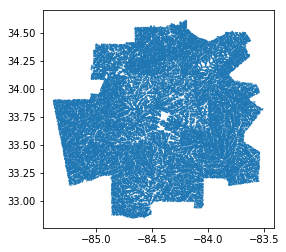

In [31]:
ax=data.plot()

If you want to learn more about the options for visualizing you can use the `help` feature on the `plot` function:

In [60]:
help(data.plot)

Help on method plot in module geopandas.geodataframe:

plot(*args, **kwargs) method of geopandas.geodataframe.GeoDataFrame instance
    Plot a GeoDataFrame.
    
    Generate a plot of a GeoDataFrame with matplotlib.  If a
    column is specified, the plot coloring will be based on values
    in that column.
    
    Parameters
    ----------
    df : GeoDataFrame
        The GeoDataFrame to be plotted.  Currently Polygon,
        MultiPolygon, LineString, MultiLineString and Point
        geometries can be plotted.
    column : str, np.array, pd.Series (default None)
        The name of the dataframe column, np.array, or pd.Series to be plotted.
        If np.array or pd.Series are used then it must have same length as
        dataframe. Values are used to color the plot. Ignored if `color` is
        also set.
    cmap : str (default None)
        The name of a colormap recognized by matplotlib.
    color : str (default None)
        If specified, all objects will be colored uniforml

Now we can easily count how many streams/rivers are in the Atlanta area:

In [35]:
streams_rivers = data[data['FEATURE_TY'] == 'Stream/River']
print("Total Number of Streams/Rivers = {}".format(len(streams_rivers)))

Total Number of Streams/Rivers = 476


Let's see if any are named "Proctor Creek"

In [50]:
for i, stream in streams_rivers.iterrows():
    name = stream['NAME']
    if name is not None and 'Proctor' in name:
        print(name)

Proctor Creek
Proctor Creek


It looks like there are 2 objects in the dataframe named "Proctor Creek". Let's plot these to see where they appear on a map:

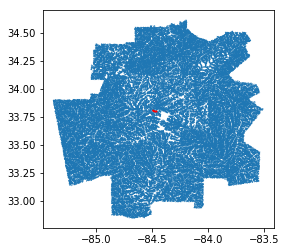

In [61]:
proctor_creek = streams_rivers[streams_rivers['NAME'] == 'Proctor Creek']
ax = data.plot()
proctor_creek.plot(ax=ax, color='r')